In [1]:
from autodp.mechanism_zoo import ExactGaussianMechanism, PureDP_Mechanism
from autodp.transformer_zoo import Composition
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from autodp.mechanism_zoo import GaussianMechanism, RandresponseMechanism, LaplaceMechanism
import numpy as np

eps = 1
sigma = 1.0 / eps
p = np.exp(eps)/(1+np.exp(eps))
b = 1.0/eps

gm3 = ExactGaussianMechanism(sigma,name='GM')
rr = RandresponseMechanism(p, name='RandResponse')

laplace = LaplaceMechanism(b,name='Laplace')

label_list = ['GM','RR','Laplace']
#['GM_optimal_RDP_conversion','GM_exact','RR_optimal_RDP_conversion', 'RR_exact']#, 'GM_naive_RDP_conversion']


/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


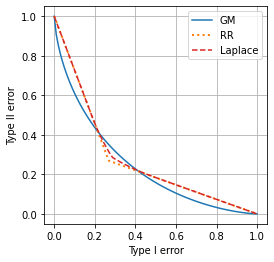

In [3]:


fpr_list1, fnr_list1 = gm3.plot_fDP()
#fpr_list4, fnr_list4 = rr.plot_fDP()
fpr_list2, fnr_list2 = rr.plot_fDP()
fpr_list3, fnr_list3 = laplace.plot_fDP()

plt.figure(figsize=(4,4))
plt.plot(fpr_list1,fnr_list1)
plt.plot(fpr_list2, fnr_list2,':',linewidth=2)
#plt.plot(fpr_list4, fnr_list4,'-.')
plt.plot(fpr_list3, fnr_list3,'--',color='#d62728')
#plt.plot(fpr_list0,fnr_list0,'-.')
#plt.plot(fdp_list1,fnr_list1)

plt.legend(label_list)
plt.xlabel('Type I error')
plt.ylabel('Type II error')
plt.grid()
plt.savefig('fdp_common_mechanisms.pdf')
plt.show()

/Users/yuxiangw/Documents/bitbucket/autodp/autodp/rdp_bank.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(alpha-1)*np.log( alpha/(2*alpha-1)*np.exp((alpha-1)/b) + (alpha-1)/(2*alpha-1)*np.exp(-alpha/b))
/Users/yuxiangw/Documents/bitbucket/autodp/autodp/rdp_bank.py:71: RuntimeWarning: invalid value encountered in double_scalars
  return 1/(alpha-1)*np.log( alpha/(2*alpha-1)*np.exp((alpha-1)/b) + (alpha-1)/(2*alpha-1)*np.exp(-alpha/b))


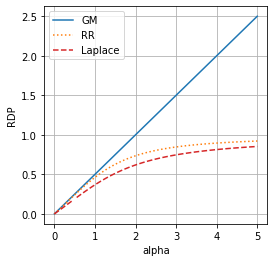

In [4]:
label_list2 = ['RDP_of_GM','RDP_of_RR']#, 'RDP_of_pureDP']  #'exact_RDP_GM',


alpha_list1, RDP_list1 = gm3.plot_RDP(alphamax=5, length=101)
#alpha_list3, RDP_list3 = gm3.plot_RDP(alphamax=5,length=101)
alpha_list2, RDP_list2 = rr.plot_RDP(alphamax=5,length=101)
alpha_list3, RDP_list3 = laplace.plot_RDP(alphamax=5,length=101)
#alpha_list5, RDP_list5 = rr2.plot_RDP(alphamax=5,length=101)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


plt.figure(figsize=(4,4))
plt.plot(alpha_list1,RDP_list1)
plt.plot(alpha_list2, RDP_list2 ,':')
plt.plot(alpha_list3, RDP_list3,'--',color=colors[3])
#plt.plot(alpha_list5, RDP_list5,'--')
plt.legend(label_list)
plt.xlabel('alpha')
plt.ylabel('RDP')
plt.grid()
plt.savefig('rdp_comparisons_common_mechanism.pdf')
plt.show()

0.0 0.5
0.0 1.2153220087631158
0.0 1.5116180862567643
0.0 1.738974062949946
0.07677616786957199 1.9306440175262316
0.3530866533433292 2.099508637396027
0.5900340967036316 2.2521739232523106
0.7992811080210882 2.3925641425183697
0.9878543793247502 2.5232361725135286
1.1603338527915605 2.645966026289347
1.319881287206115 2.7620468081383707
1.4687773546817942 2.872454707350572
1.608725178591512 2.9779481258998923
1.7410327793095617 3.0791301810633147
1.8667282963384664 3.1764898780104858
1.9866357732900533 3.270430227115183
2.1014267275250043 3.361288035052463
2.211656269999978 3.449348198459328
2.317789040304051 3.534854258770293
2.4202182354054007 3.6180163482889376
2.519279838470766 3.699017274792054
2.6152634385678932 3.7780172514248425
2.708420582013839 3.8551576232510714
2.798971305535642 3.930563838945528
2.8871093092946993 4.004347846504621
2.973006098117145 4.076610043815579
3.056814330013983 4.147440881185516
3.138670548582942 4.216922188849838
3.2186974314384322 4.2851282850367

/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


 4.851133912001935
3.938407785185775 4.9095410074512476
4.003835747145722 4.9671845129359795
4.068284491401894 5.024093616276741
4.131794808023628 5.080295691880259
4.194404791103704 5.135816454657988
4.256150078640797 5.190680097544348
4.317064065893149 5.244909414701144
4.377178095681224 5.298525912188081
4.436521628593419 5.351549907623475
4.495122395613787 5.40400062014497
4.553006535327555 5.455896251799785
4.610198717555828 5.50725406134181
4.666722255015394 5.558090431283821
4.722599204382901 5.608420928943292
4.77785045795991 5.658260362126629
4.832495826979517 5.707622830016364
4.886554117462211 5.756521769756932
4.940043199415047 5.804969999175249
4.992980070070462 5.8529797560209715
5.045380911776887 5.900562734066816
5.097261145080913 5.947730116370684
5.148635477477444 5.994492605967638
5.199517948250063 6.040860454230366
5.249921969776093 6.086843487111022
5.299860365629273 6.132451129454719
5.349345405776833 6.17769242755511
5.398388839135833 6.222576070104926
5.44700192

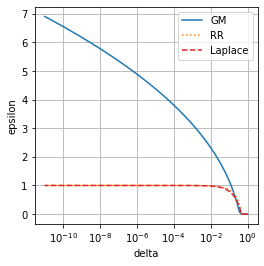

In [24]:
delta_list = 10.0**np.array(-np.linspace(0,11,100))
eps_list_gm = np.zeros_like(delta_list)
eps_list_rr = np.zeros_like(delta_list)
eps_list_laplace = np.zeros_like(delta_list)
for i,delta in enumerate(delta_list):
    eps_list_gm[i] = gm3.approxDP(delta)
    eps_list_rr[i] = rr.approxDP(delta)
    eps_list_laplace[i] = laplace.approxDP(delta)
    print(eps_list_gm3[i],eps_list_gm1[i])
    
label_list2 = ['GM', 'RR','Laplace']
plt.figure(figsize=(4,4))

plt.plot(delta_list,eps_list_gm)
#plt.plot(alpha_list3, RDP_list3 ,':')
plt.plot(delta_list,eps_list_rr,':')
plt.plot(delta_list, eps_list_laplace,'--',color=colors[3])
#plt.plot(alpha_list5, RDP_list5,'--')
plt.xscale('log')
plt.legend(label_list2)
plt.xlabel('delta')
plt.ylabel('epsilon')
plt.grid()
plt.savefig('dp_comparisons_common_mechanism.pdf')
plt.show()

/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


0.0 0.5
0.0 1.2153220087631158
0.0 1.5116180862567643
0.0 1.738974062949946
0.07677616786957199 1.9306440175262316
0.3530866533433292 2.099508637396027
0.5900340967036316 2.2521739232523106
0.7992811080210882 2.3925641425183697
0.9878543793247502 2.5232361725135286
1.1603338527915605 2.645966026289347
1.319881287206115 2.7620468081383707
1.4687773546817942 2.872454707350572
1.608725178591512 2.9779481258998923
1.7410327793095617 3.0791301810633147
1.8667282963384664 3.1764898780104858
1.9866357732900533 3.270430227115183
2.1014267275250043 3.361288035052463
2.211656269999978 3.449348198459328
2.317789040304051 3.534854258770293
2.4202182354054007 3.6180163482889376
2.519279838470766 3.699017274792054
2.6152634385678932 3.7780172514248425
2.708420582013839 3.8551576232510714
2.798971305535642 3.930563838945528
2.8871093092946993 4.004347846504621
2.973006098117145 4.076610043815579
3.056814330013983 4.147440881185516
3.138670548582942 4.216922188849838
3.2186974314384322 4.2851282850367

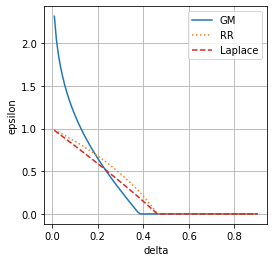

In [28]:
delta_list = np.linspace(0.01,0.9,100)
eps_list_gm = np.zeros_like(delta_list)
eps_list_rr = np.zeros_like(delta_list)
eps_list_laplace = np.zeros_like(delta_list)
for i,delta in enumerate(delta_list):
    eps_list_gm[i] = gm3.approxDP(delta)
    eps_list_rr[i] = rr.approxDP(delta)
    eps_list_laplace[i] = laplace.approxDP(delta)
    print(eps_list_gm3[i],eps_list_gm1[i])
    
label_list2 = ['GM', 'RR','Laplace']
plt.figure(figsize=(4,4))

plt.plot(delta_list,eps_list_gm)
#plt.plot(alpha_list3, RDP_list3 ,':')
plt.plot(delta_list,eps_list_rr,':')
plt.plot(delta_list, eps_list_laplace,'--',color=colors[3])
#plt.plot(alpha_list5, RDP_list5,'--')
plt.legend(label_list2)
plt.xlabel('delta')
plt.ylabel('epsilon')
plt.grid()
plt.savefig('dp_comparisons_common_mechanism_linscale.pdf')
plt.show()

In [ ]:
## Compare GM classic vs GM optimal RDP conversion vs Analytical GM

In [20]:

delta_list = 10.0**np.array(-np.linspace(0,11,100))
eps_list_gm1 = np.zeros_like(delta_list)
eps_list_gm3 = np.zeros_like(delta_list)
eps_list_rr = np.zeros_like(delta_list)
for i,delta in enumerate(delta_list):
    eps_list_gm1[i] = classical_gm(delta,1.0)
    eps_list_gm1b[i] = gm1b.approxDP(delta)
    eps_list_gm3[i] = gm3.approxDP(delta)
    print(eps_list_gm3[i],eps_list_gm1[i])
    



0.0 0.5
0.0 1.2153220087631158
0.0 1.5116180862567643
0.0 1.738974062949946
0.07677616786957199 1.9306440175262316
0.3530866533433292 2.099508637396027
0.5900340967036316 2.2521739232523106
0.7992811080210882 2.3925641425183697
0.9878543793247502 2.5232361725135286
1.1603338527915605 2.645966026289347
1.319881287206115 2.7620468081383707
1.4687773546817942 2.872454707350572
1.608725178591512 2.9779481258998923
1.7410327793095617 3.0791301810633147
1.8667282963384664 3.1764898780104858
1.9866357732900533 3.270430227115183
2.1014267275250043 3.361288035052463
2.211656269999978 3.449348198459328
2.317789040304051 3.534854258770293
2.4202182354054007 3.6180163482889376
2.519279838470766 3.699017274792054
2.6152634385678932 3.7780172514248425
2.708420582013839 3.8551576232510714
2.798971305535642 3.930563838945528
2.8871093092946993 4.004347846504621
2.973006098117145 4.076610043815579
3.056814330013983 4.147440881185516
3.138670548582942 4.216922188849838
3.2186974314384322 4.2851282850367

/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


 6.222576070104926
5.4470019237257 6.267110407678913
5.495195454629284 6.311303470872893
5.5429797899530415 6.355162987210538
5.5903648749576 6.398696396918656
5.63736026451327 6.441910867662189
5.6839751440196515 6.484813308321566
5.730218348915136 6.5274103818873845
5.776098382890267 6.569708517540586
5.8216234349082 6.611713921980121
5.866801395125769 6.653432590054638
5.911639869800439 6.69487031474973
5.956146195260646 6.736032696577875
6.000327451009939 6.776925152414136
6.04419047202961 6.817552923817111
6.087741860338385 6.857921084871298
6.13098799586332 6.898034549584108
6.173935046670908 6.9378980788680416
6.216588978603796 6.977516287136121
6.258955564364485 7.016893648536442
6.301040392084302 7.056034502849685
6.342848873412333 7.094943061071598
6.384386251157196 7.133623410700769
6.425657606510752 7.172079520750499
6.466667865881672 7.210315246502143
6.5074218073641585 7.248334334016062
6.547924066864952 7.286140424415112
6.588179143910679 7.323737057954521
6.628191407155

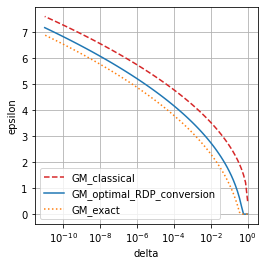

In [21]:
label_list2 = ['GM_classical', 'GM_optimal_RDP_conversion','GM_exact']
plt.figure(figsize=(4,4))
plt.plot(delta_list, eps_list_gm1,'--',color=colors[3])
plt.plot(delta_list,eps_list_gm1b)
#plt.plot(alpha_list3, RDP_list3 ,':')
plt.plot(delta_list,eps_list_gm3,':')
#plt.plot(alpha_list5, RDP_list5,'--')
plt.xscale('log')
plt.legend(label_list2)
plt.xlabel('delta')
plt.ylabel('epsilon')
plt.grid()
plt.savefig('dp_comparisons_gm_high_privacy.pdf')
plt.show()


In [ ]:
delta_lists

In [ ]:
RDP_list3 - RDP_list4

In [ ]:
from autodp.mechanism_zoo import GaussianMechanism
import numpy as np

sigma = 1.0

gm0 = GaussianMechanism(sigma,name='GM0',approxDP_off=True, use_basic_RDP_to_approxDP_conversion=True)
gm1 = GaussianMechanism(sigma,name='GM1',approxDP_off=True)
gm1b = GaussianMechanism(sigma,name='GM1b',approxDP_off=True, use_fDP_based_RDP_to_approxDP_conversion=True)
gm2 = GaussianMechanism(sigma,name='GM2',RDP_off=True)
gm3 = GaussianMechanism(sigma,name='GM3',RDP_off=True, approxDP_off=True, fdp_off=False)


eps = np.sqrt(2)/sigma # Aligning the variance of the laplace mech and gaussian mech
laplace = PureDP_Mechanism(eps,name='Laplace')

label_list = ['naive_RDP_conversion','BBGHS_RDP_conversion','Optimal_RDP_conversion',
              'analytical GM','exact fDP']


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


fpr_list, fnr_list = gm0.plot_fDP()
fpr_list1, fnr_list1 = gm1.plot_fDP()
fpr_list1b, fnr_list1b = gm1b.plot_fDP()
fpr_list2, fnr_list2 = gm2.plot_fDP()
fpr_list3, fnr_list3 = gm3.plot_fDP()
#fpr_list4, fnr_list4 = laplace.plot_fDP()

plt.figure(figsize=(3.5,3.5))
plt.plot(fpr_list,fnr_list,'--',color=colors[3])
plt.plot(fpr_list1,fnr_list1,'-.',color=colors[4])
plt.plot(fpr_list1b,fnr_list1b,color=colors[0])
plt.plot(fpr_list2, fnr_list2,'-',color=colors[2])
plt.plot(fpr_list3, fnr_list3,':',color=colors[1],linewidth=2)
#plt.plot(fpr_list4, fnr_list4,'-.')
plt.legend(label_list)
plt.xlabel('Type I error')
plt.ylabel('Type II error')
plt.savefig('rdp2fdp.pdf')
plt.show()

In [ ]:
from autodp.mechanism_zoo import GaussianMechanism
import numpy as np

sigma = 10

gm0 = GaussianMechanism(sigma,name='GM0',approxDP_off=True, use_basic_RDP_to_approxDP_conversion=True)
gm1 = GaussianMechanism(sigma,name='GM1',approxDP_off=True)
gm1b = GaussianMechanism(sigma,name='GM1b',approxDP_off=True, use_fDP_based_RDP_to_approxDP_conversion=True)
gm2 = GaussianMechanism(sigma,name='GM2',RDP_off=True)
gm3 = GaussianMechanism(sigma,name='GM3',RDP_off=True, approxDP_off=True, fdp_off=False)


eps = np.sqrt(2)/sigma # Aligning the variance of the laplace mech and gaussian mech
laplace = PureDP_Mechanism(eps,name='Laplace')

label_list = ['naive_RDP_conversion','BBGHS_RDP_conversion','Optimal_RDP_conversion',
              'analytical GM','exact fDP']


In [ ]:
rr.get_approxDP(1e-3)

In [ ]:
gm3.get_approxDP(0.01)

In [ ]:
laplace.get_approxDP(0.01)

In [ ]:
A = np.array([[0.7,0.4],[0.3,0.6]])
print(A)

In [ ]:
x = np.array([1,0])

In [ ]:
np.dot(A,x)

In [ ]:
k=25
y=x
for i in range(k):
    y = np.dot(A,y)
    print(y)

In [ ]:
lam, V =np.linalg.eig(A)

In [ ]:
V[:,1]

In [ ]:
V[:,0]/np.norm(V[:,0])

In [ ]:
A@y